# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Your code here
boston_price = pd.read_csv('/Users/adrientalbot/Documents/To-do-10%/lab-problems-with-ML/data/boston_data.csv')

Details of data set: 

crim
per capita crime rate by town.

zn
proportion of residential land zoned for lots over 25,000 sq.ft.

indus
proportion of non-retail business acres per town.

chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox
nitrogen oxides concentration (parts per 10 million).

rm
average number of rooms per dwelling.

age
proportion of owner-occupied units built prior to 1940.

dis
weighted mean of distances to five Boston employment centres.

rad
index of accessibility to radial highways.

tax
full-value property-tax rate per $10,000.

ptratio
pupil-teacher ratio by town.

black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat
lower status of the population (percent).

medv
median value of owner-occupied homes in $1000s.

In [3]:
boston_price.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
boston_price.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

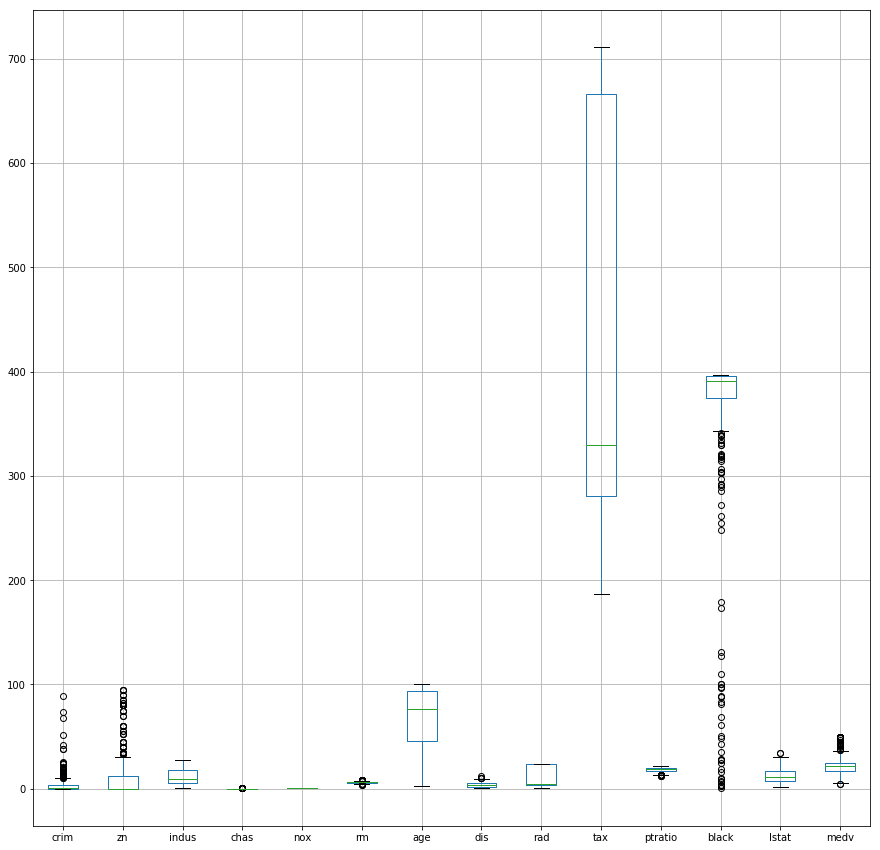

In [5]:
plt.figure(figsize=(15,15))
boston_price.boxplot()

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

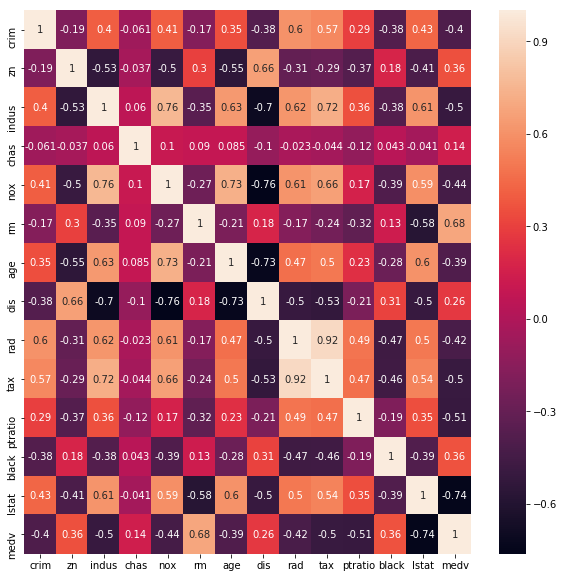

In [6]:
# Your plots here
plt.figure(figsize=(10,10))

sns.heatmap(boston_price.corr(), annot=True)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


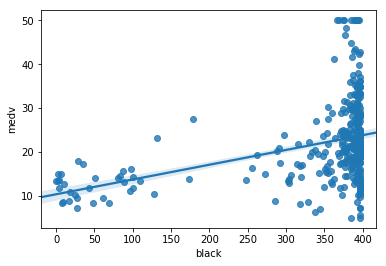

In [7]:
x = boston_price['black']
y = boston_price['medv']
sns.regplot(x,y)

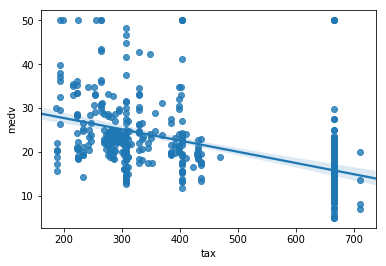

In [8]:
x = boston_price['tax']
y = boston_price['medv']
sns.regplot(x,y)

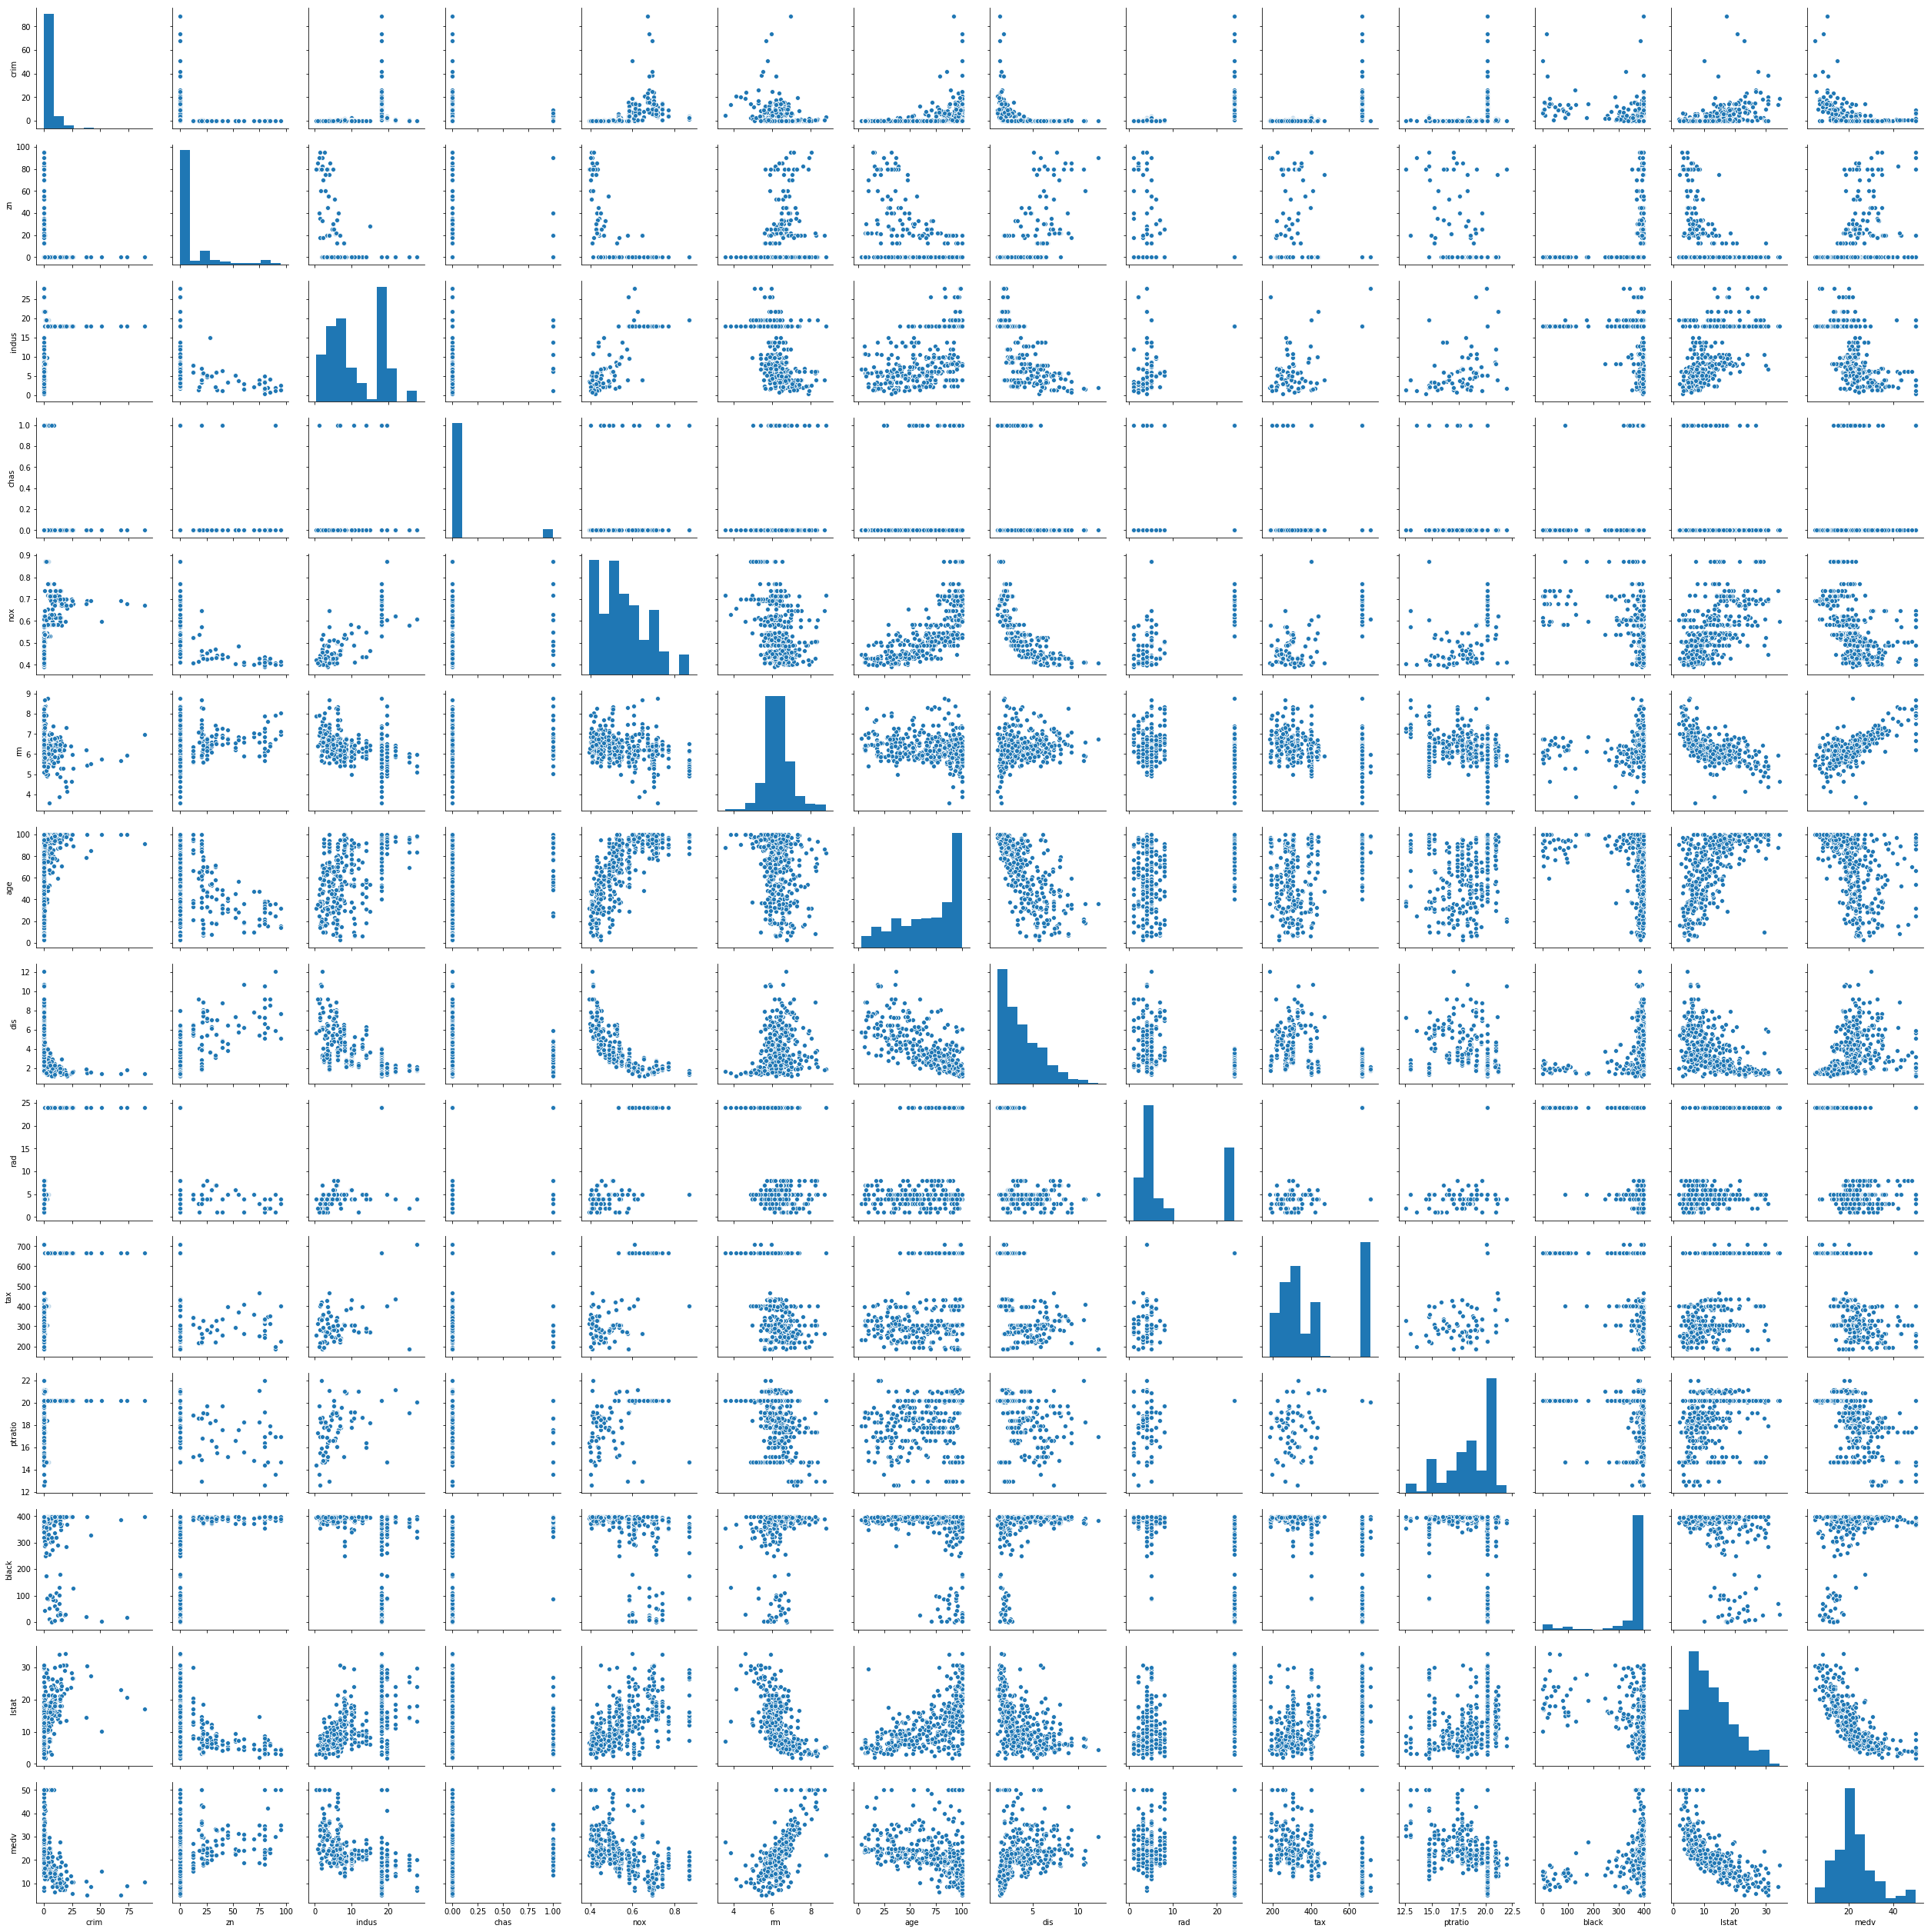

In [9]:
sns.pairplot(boston_price)

In [10]:
boston_price.corr()['medv']

crim      -0.400956
zn         0.355608
indus     -0.501698
chas       0.141400
nox       -0.439225
rm         0.683541
age       -0.390863
dis        0.264876
rad       -0.423508
tax       -0.495792
ptratio   -0.506313
black      0.360071
lstat     -0.742695
medv       1.000000
Name: medv, dtype: float64

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [11]:
# Your response here
# I expected negative correlation with crim, indux, nox, tax and ptratio, which happened to be the case.
# However, there is also a negative correlation between prices and age (-0.39) and lstat (lower status of population in percent)

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [12]:
# Your response here
# We will drop one of the variables that are highly correlated (tax and rad)
boston_price = boston_price.drop(['tax'], axis = 1)

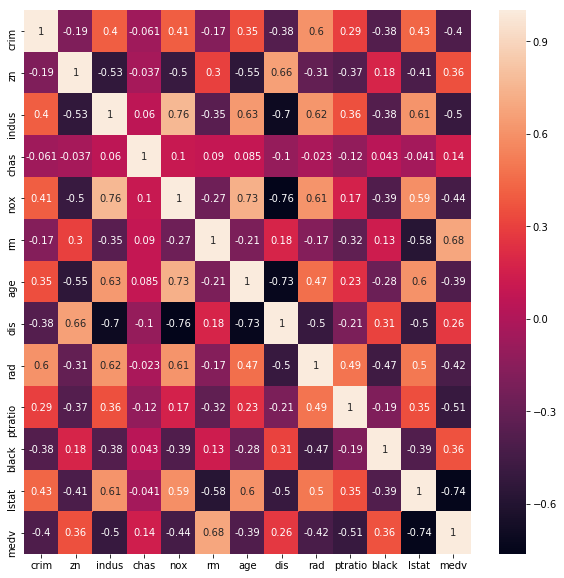

In [13]:
plt.figure(figsize=(10,10))

sns.heatmap(boston_price.corr(), annot=True)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [14]:
# Your code here
boston_price['medv'].mean()

22.312376237623763

In [15]:
boston_price['medv'].max()

50.0

In [16]:
boston_price['medv'].min()

5.0

In [17]:
boston_price['medv'].std()

8.837018646457969

In [18]:
boston_price['medv'].median()

21.4

In [19]:
boston_price['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [20]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Your code here:
    return r2_score(y_true, y_predict) 

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [21]:
# Your code here 
from sklearn.model_selection import train_test_split

target = boston_price['medv']
features = boston_price.drop(columns='medv')

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle = True)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [22]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

regr_2 = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
regr_4 = RandomForestRegressor(max_depth=4, random_state=0,n_estimators=100)
regr_6 = RandomForestRegressor(max_depth=6, random_state=0,n_estimators=100)
regr_8 = RandomForestRegressor(max_depth=8, random_state=0,n_estimators=100)
regr_10 = RandomForestRegressor(max_depth=10, random_state=0,n_estimators=100)

regr_2.fit(X_train, y_train)
regr_4.fit(X_train, y_train)
regr_6.fit(X_train, y_train)
regr_8.fit(X_train, y_train)
regr_10.fit(X_train, y_train)

y_pred_2 = regr_2.predict(X_test)
y_pred_4 = regr_4.predict(X_test)
y_pred_6 = regr_6.predict(X_test)
y_pred_8 = regr_8.predict(X_test)
y_pred_10 = regr_10.predict(X_test)


Now, plot the score for each tree on the training set and on the testing set.

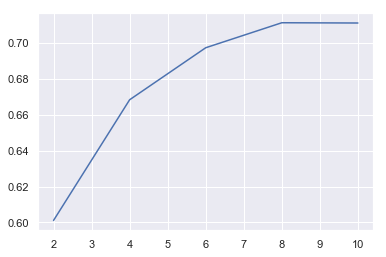

In [23]:
# Produce a plot with the score for the testing and training for the different max depths
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

scores = []
rang = [2,4,6,8,10]

score_2 = performance_metric(y_test, y_pred_2)
score_4 = performance_metric(y_test, y_pred_4)
score_6 = performance_metric(y_test, y_pred_6)
score_8 = performance_metric(y_test, y_pred_8)
score_10 = performance_metric(y_test, y_pred_10)

scores.append(score_2)
scores.append(score_4)
scores.append(score_6)
scores.append(score_8)
scores.append(score_10)

plt.plot(rang, scores)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [24]:
# Your response here
# At some point, the depth factor has no positive impact on the accuracy of the model. 

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [25]:
# Your response here
# Low depth has higher bias and low variance (underfitting), but as depth increases, bias decreases and variance increases (overfitting issue). 

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [26]:
# Your response here

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [27]:
# Your response here